In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [176]:
import datetime as dt

def get_total_seconds(stringHMS):
   timedeltaObj = dt.datetime.strptime(stringHMS, "%H : %M : %S") - dt.datetime(1900,1,1)
   return timedeltaObj.total_seconds()

In [177]:
def mnk(x,y,free=1):
    k,a=np.polyfit(x, y, free)
    mu = np.mean(y) # средее
    mv = np.mean(x)
    mu2 = np.mean(y**2)
    mv2 = np.mean(x**2) # средний квадрат
    muv = np.mean (x*y) 
    sigma_k = np.sqrt(1/(x.shape[0]-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    print("Погрешность углового коэфицента")
    print(sigma_k)
    sigma_b = sigma_k * np.sqrt(mv2-mv**2)
    print("Погрешность свободного коэфицента")
    print(sigma_b)
    return (k,a)

In [178]:
room_temp=pd.read_csv("213_lavygin_melnikov_Rec1.csv")
int_temp=pd.read_csv("213_lavygin_melnikov_Rec2.csv")

In [179]:
int_temp

,Time,Value,Value_2ND,,DateTime : ( 23 / 03 / 28 -- 14 : 16 : 27 )
0,14 : 17 : 48,17.902937,,NaN,NaN
1,14 : 17 : 49,17.902918,,NaN,NaN
2,14 : 17 : 50,17.902912,,NaN,NaN
3,14 : 17 : 51,17.903011,,NaN,NaN
4,14 : 17 : 52,17.903145,,NaN,NaN
...,...,...,...,...,...
119517,16 : 56 : 01,18.395172,,NaN,NaN
119518,16 : 56 : 02,18.395426,,NaN,NaN
119519,16 : 56 : 03,18.395029,,NaN,NaN
119520,16 : 56 : 04,18.395206,,NaN,NaN


In [180]:
int_temp=int_temp.drop(columns=[ "Value_2ND","DateTime : ( 23 / 03 / 28 -- 14 : 16 : 27 )"," "])
int_temp

,Time,Value
0,14 : 17 : 48,17.902937
1,14 : 17 : 49,17.902918
2,14 : 17 : 50,17.902912
3,14 : 17 : 51,17.903011
4,14 : 17 : 52,17.903145
...,...,...
119517,16 : 56 : 01,18.395172
119518,16 : 56 : 02,18.395426
119519,16 : 56 : 03,18.395029
119520,16 : 56 : 04,18.395206


In [181]:
room_temp=room_temp.drop(columns=[ "Value_2ND","DateTime : ( 23 / 03 / 28 -- 14 : 16 : 26 )", " "])
room_temp

,Time,Value
0,14 : 17 : 48,22.933912
1,14 : 17 : 49,22.961226
2,14 : 17 : 50,22.969335
3,14 : 17 : 51,22.989260
4,14 : 17 : 52,23.002264
...,...,...
109814,16 : 56 : 01,25.191061
109815,16 : 56 : 02,25.173386
109816,16 : 56 : 03,25.176573
109817,16 : 56 : 04,25.203220


In [182]:
from datetime import datetime
room_temp["Sec"]=room_temp.Time
int_temp["Sec"]=int_temp.Time

In [183]:
room_temp["Sec"]=room_temp["Sec"].apply(get_total_seconds)
int_temp["Sec"]=int_temp["Sec"].apply(get_total_seconds)

In [184]:
int_temp["Temp"]=int_temp["Value"]*14.377980252+39.3551401869-273.15


In [185]:
room_temp["Sec"]=room_temp["Sec"]-get_total_seconds("14 : 16 : 40")
int_temp["Sec"]=int_temp["Sec"]-get_total_seconds("14 : 16 : 40")
int_temp=int_temp.iloc[110023:]
room_temp=room_temp.iloc[100320:]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


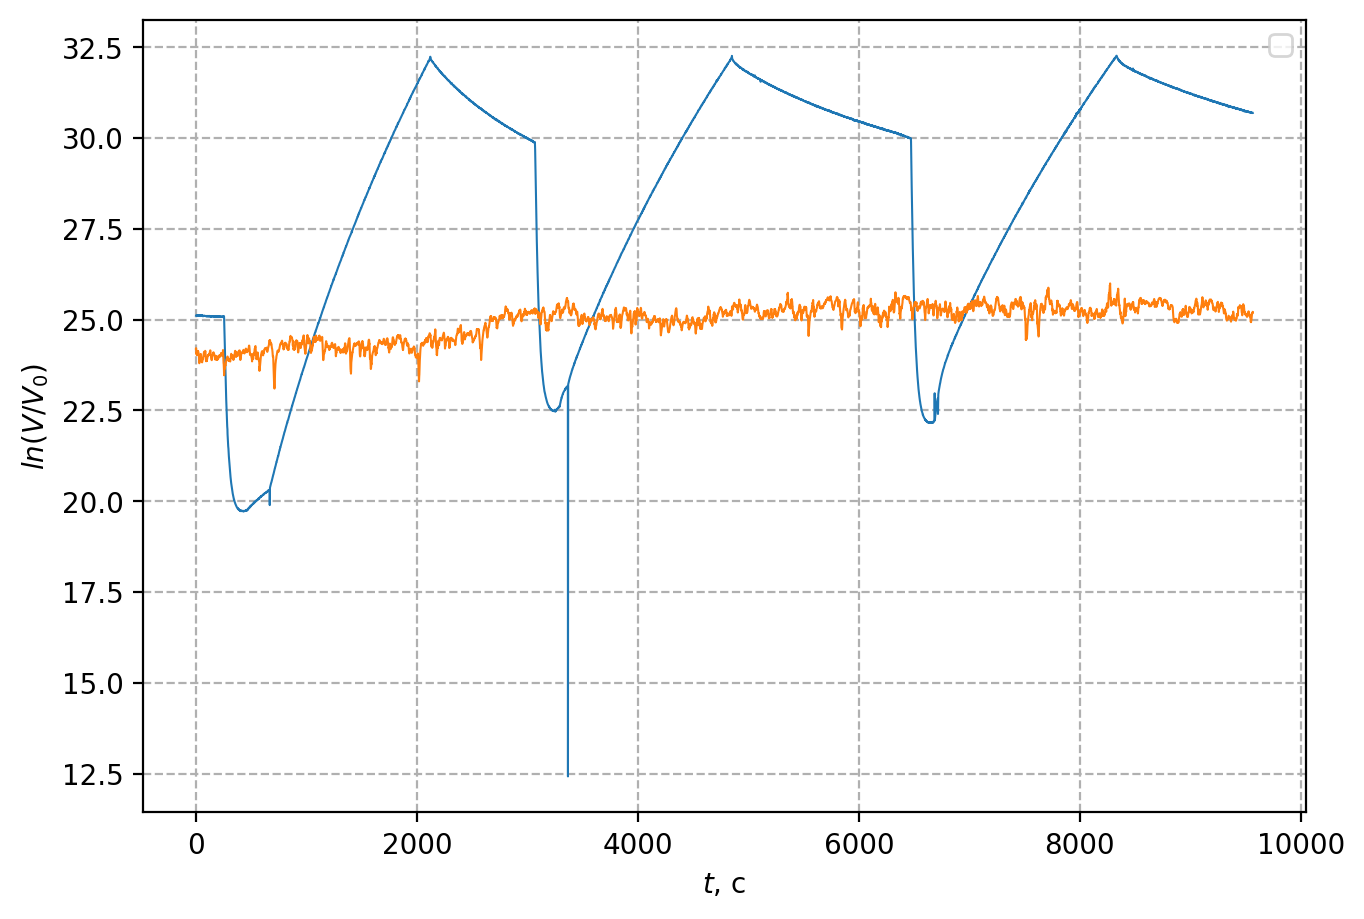

In [186]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$ln(V/V_0)$") # подписи к осям
plt.xlabel("$t$, с")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.plot(int_temp["Sec"], int_temp["Temp"],linewidth=1.5/2)
plt.plot(room_temp["Sec"], room_temp["Value"],linewidth=1.5/2)
plt.legend() # легенда

In [187]:
room_temp[room_temp.Time=="14 : 53 : 00"]

,Time,Value,Sec
102485,14 : 53 : 00,24.03204,2180.0


In [188]:
room_cool_none=room_temp.loc[102485:103319].copy()
int_cool_none=(int_temp.loc[112187:113021]).copy()


In [189]:
int_cool_none

,Time,Value,Sec,Temp
112187,14 : 53 : 00,18.482065,2180.0,31.939909
112188,14 : 53 : 01,18.481783,2181.0,31.935850
112189,14 : 53 : 02,18.481857,2182.0,31.936918
112190,14 : 53 : 03,18.481752,2183.0,31.935410
112191,14 : 53 : 04,18.481609,2184.0,31.933354
...,...,...,...,...
113017,15 : 06 : 56,18.344362,3016.0,29.960018
113018,15 : 06 : 56,18.344484,3016.0,29.961773
113019,15 : 06 : 57,18.344433,3017.0,29.961033
113020,15 : 06 : 58,18.344704,3018.0,29.964926


In [190]:
print(mnk(room_cool_none["Sec"],room_cool_none["Value"]))
room_cool_none["Value"].mean()

Погрешность углового коэфицента
2.3166432578208054e-05
Погрешность свободного коэфицента
0.005622032972709074
(0.0011356118445668957, 21.817212562086233)


24.77015968167666

In [191]:
int_cool_none["ln"]=np.log((int_cool_none["Temp"]-24.77)/(31.939909-24.77))

In [192]:
kcn,acn=mnk(int_cool_none.loc[112587:113021]["Sec"],int_cool_none.loc[112587:113021]["ln"])

Погрешность углового коэфицента
5.16104299884629e-07
Погрешность свободного коэфицента
6.521738753399954e-05


In [193]:
print(kcn)

-0.0003425717182102237


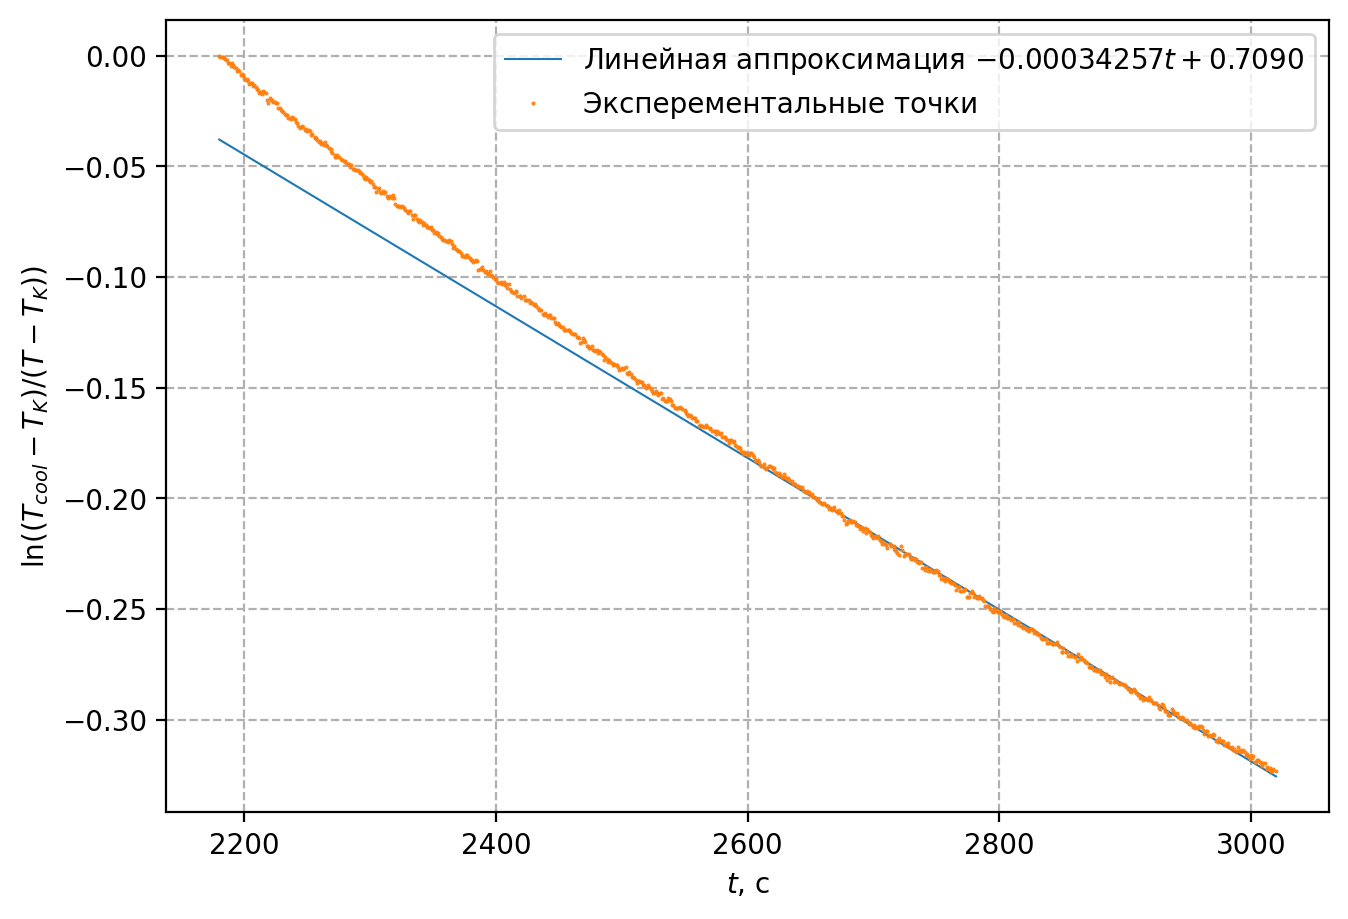

In [194]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$\ln ((T_{cool}-T_{K})/(T-T_{K}))$") # подписи к осям
plt.xlabel("$t$, с")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.plot(int_cool_none["Sec"], kcn * int_cool_none["Sec"] + acn,linewidth=1.5/2, label="Линейная аппроксимация $%.8f t + %.4f$" % (kcn, acn)) # аппроксимация
plt.errorbar(int_cool_none["Sec"], int_cool_none["ln"],  fmt="o", label="Эксперементальные точки", ms=0.9/2)
plt.legend() # легенда

In [195]:
room_heat_none=room_temp.loc[100995:102365].copy()
int_heat_none=int_temp.loc[110698:112068].copy()


In [196]:
int_heat_none[24.24<int_heat_none["Temp"]]

,Time,Value,Sec,Temp
111052,14 : 33 : 57,17.947393,1037.0,24.252408
111053,14 : 33 : 58,17.948811,1038.0,24.272783
111054,14 : 33 : 59,17.948791,1039.0,24.272510
111055,14 : 34 : 00,17.949549,1040.0,24.283397
111056,14 : 34 : 01,17.950163,1041.0,24.292226
...,...,...,...,...
112064,14 : 50 : 56,18.473650,2056.0,31.818914
112065,14 : 50 : 57,18.474075,2057.0,31.825030
112066,14 : 50 : 58,18.474546,2058.0,31.831803
112067,14 : 50 : 59,18.475019,2059.0,31.838604


In [197]:
print(mnk(int_heat_none.loc[111046:111056].Sec,int_heat_none.loc[111046:111056].Temp ))

Погрешность углового коэфицента
0.00045026852935386817
Погрешность свободного коэфицента
0.0014238741114526077
(0.009430085907879806, 14.475386828538158)


In [198]:
int_heat_none["Sec"]=int_heat_none.Sec-1037

In [199]:
print(mnk(room_heat_none["Sec"],room_heat_none["Value"]))

Погрешность углового коэфицента
1.4154804067201757e-05
Погрешность свободного коэфицента
0.005641337431699748
(2.5464167139357575e-07, 24.249550176224485)


In [200]:
int_heat_none["exp"]=np.exp(kcn*int_heat_none.Sec)

In [201]:
khn,ahn=mnk(int_heat_none.loc[110998:]["exp"],int_heat_none.loc[110998:]["Temp"])

Погрешность углового коэфицента
0.010689739601071316
Погрешность свободного коэфицента
0.0009701400413476527


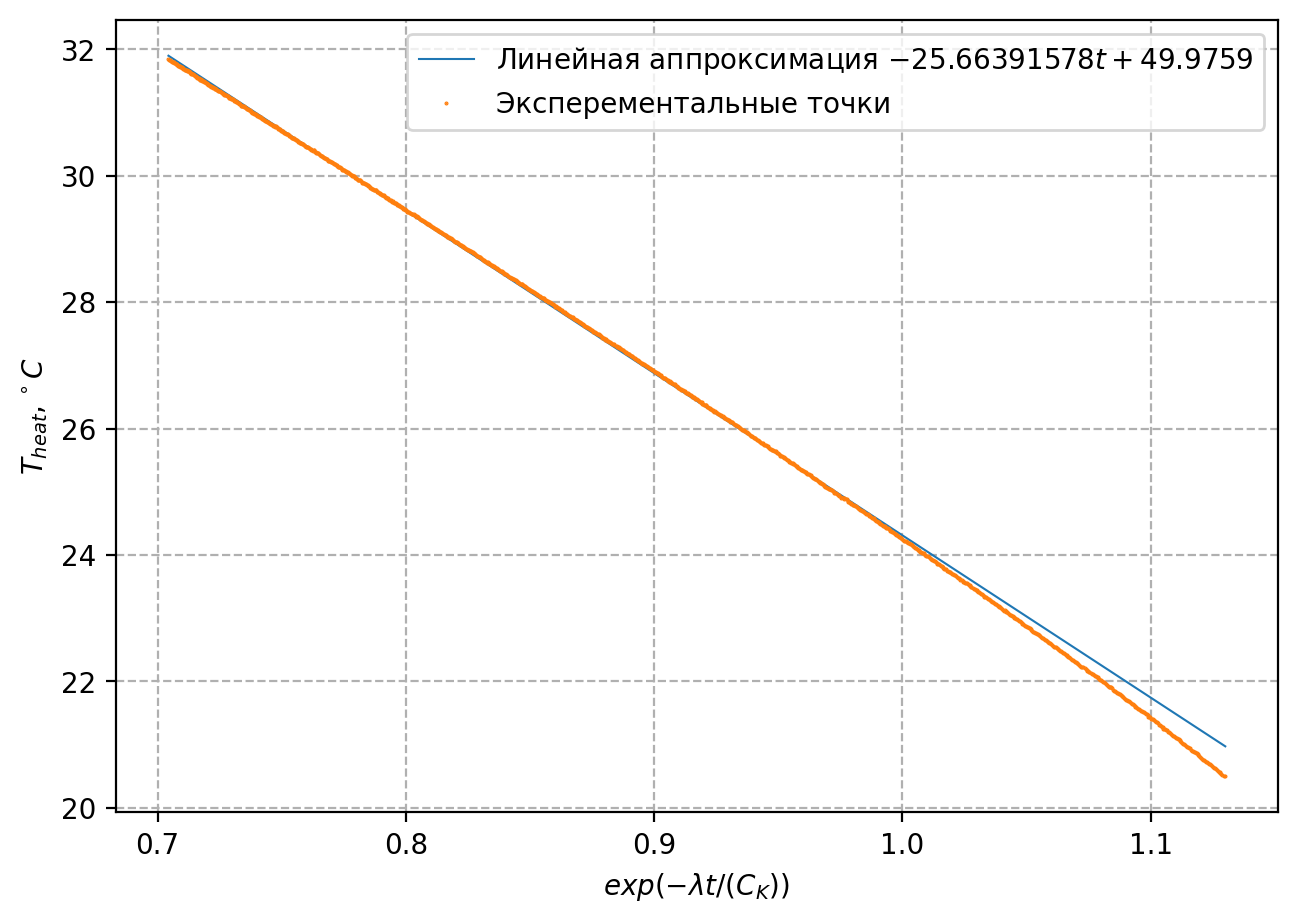

In [202]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$T_{heat}, ^\circ C$") # подписи к осям
plt.xlabel("$exp( {-\lambda t}/(C_K))$")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.plot(int_heat_none["exp"], khn * int_heat_none["exp"] + ahn,linewidth=1.5/2, label="Линейная аппроксимация $%.8f t + %.4f$" % (khn, ahn)) # аппроксимация
plt.errorbar(int_heat_none["exp"], int_heat_none["Temp"],  fmt="o", label="Эксперементальные точки", ms=0.9/2)
plt.legend() # легенда

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


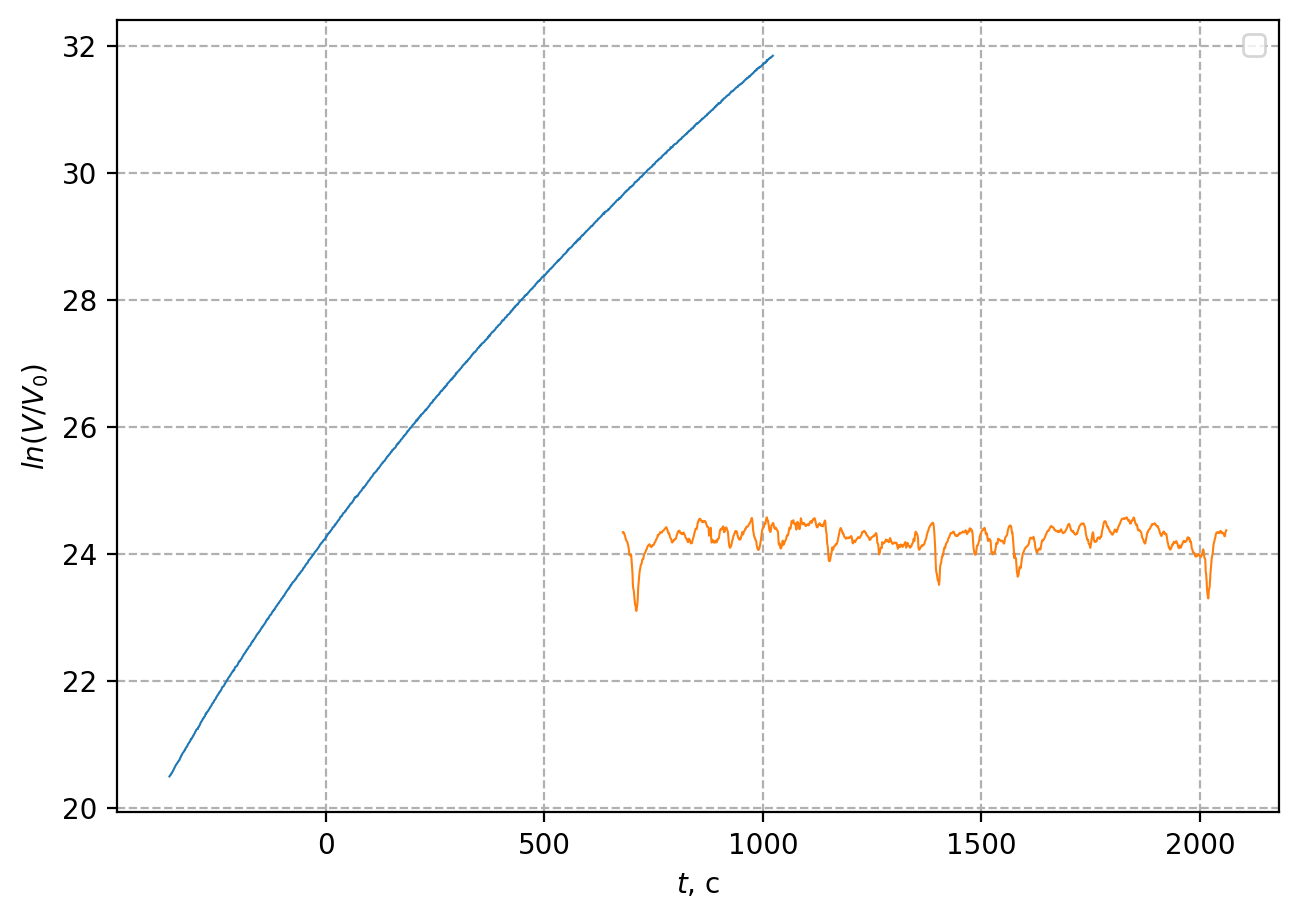

In [203]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$ln(V/V_0)$") # подписи к осям
plt.xlabel("$t$, с")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.plot(int_heat_none["Sec"], int_heat_none["Temp"],linewidth=1.5/2)
plt.plot(room_heat_none["Sec"], room_heat_none["Value"],linewidth=1.5/2)
plt.legend() # легенда

In [204]:
room_temp[room_temp.Time=="16 : 02 : 00"]

,Time,Value,Sec
106596,16 : 02 : 00,25.221912,6320.0


In [205]:
room_heat_al=room_temp.loc[103676	:105106].copy()
int_heat_al=int_temp.loc[113379:114809].copy()

In [206]:
room_cool_al=room_temp.loc[105166:106596].copy()
int_cool_al=(int_temp.loc[114869:116298]).copy()

In [207]:
print(mnk(room_cool_al["Sec"],room_cool_al["Value"]))
room_cool_al["Value"].mean()

Погрешность углового коэфицента
1.0960336645154748e-05
Погрешность свободного коэфицента
0.004559684693465387
(-2.051934026340802e-05, 25.382511040107236)


25.267600096226392

In [208]:
int_cool_al

,Time,Value,Sec,Temp
114869,15 : 38 : 00,18.490664,4880.0,32.063535
114870,15 : 38 : 01,18.490179,4881.0,32.056569
114871,15 : 38 : 02,18.490589,4882.0,32.062465
114872,15 : 38 : 03,18.490368,4883.0,32.059283
114873,15 : 38 : 05,18.490374,4885.0,32.059367
...,...,...,...,...
116294,16 : 01 : 56,18.357904,6316.0,30.154727
116295,16 : 01 : 57,18.357950,6317.0,30.155386
116296,16 : 01 : 58,18.357691,6318.0,30.151656
116297,16 : 01 : 59,18.358341,6319.0,30.161007


In [236]:
print(mnk(int_heat_al.loc[113581:113585].Sec,int_heat_al.loc[113581:113585].Temp ))

Погрешность углового коэфицента
0.002232147811436318
Погрешность свободного коэфицента
0.0029612787068588973
(0.007531741568867527, 25.02360054532793)


In [210]:
int_cool_al["ln"]=np.log((int_cool_al["Temp"]-25.268)/(32.063535-25.268))

In [211]:
kca,aca=mnk(int_cool_al.loc[115369:]["Sec"],int_cool_al.loc[115369:]["ln"])

Погрешность углового коэфицента
2.539582814928842e-07
Погрешность свободного коэфицента
6.865737890678246e-05


In [212]:
kca

-0.00020379817072167764

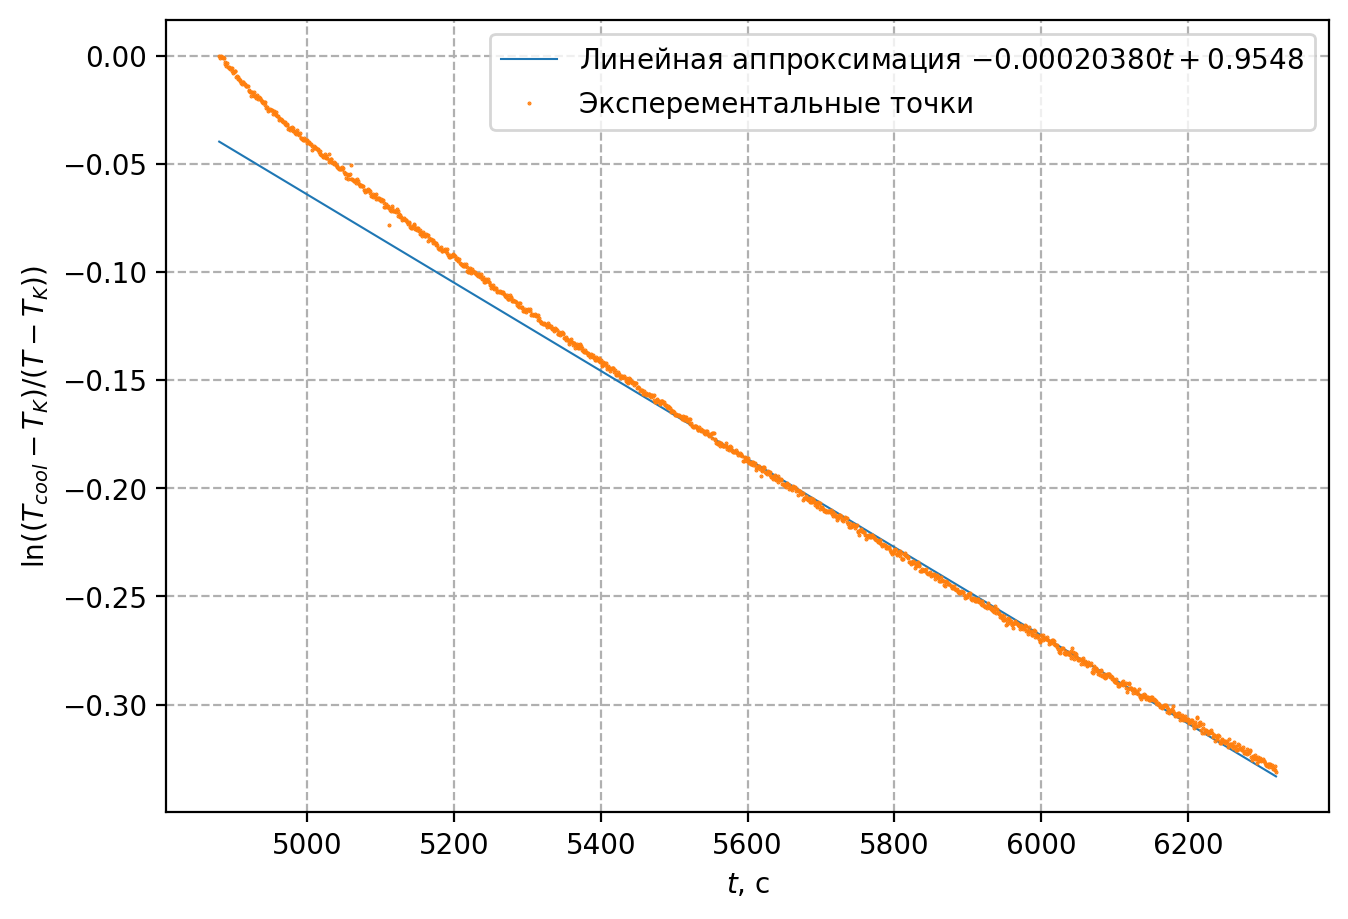

In [213]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$\ln ((T_{cool}-T_{K})/(T-T_{K}))$") # подписи к осям
plt.xlabel("$t$, с")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.plot(int_cool_al["Sec"], kca * int_cool_al["Sec"] + aca,linewidth=1.5/2, label="Линейная аппроксимация $%.8f t + %.4f$" % (kca, aca)) # аппроксимация
plt.errorbar(int_cool_al["Sec"], int_cool_al["ln"],  fmt="o", label="Эксперементальные точки", ms=0.9/2)
plt.legend() # легенда

In [214]:
print(mnk(room_heat_al["Sec"],room_heat_al["Value"]))
room_heat_al["Value"].mean()

Погрешность углового коэфицента
9.806800915095672e-06
Погрешность свободного коэфицента
0.004079571929679532
(-4.623936473487671e-05, 25.219411131007696)


25.029842757582138

In [215]:
int_heat_al[25.03>int_heat_al["Temp"]]

,Time,Value,Sec,Temp
113379,15 : 13 : 00,17.885298,3380.0,23.359597
113380,15 : 13 : 01,17.885458,3381.0,23.361901
113381,15 : 13 : 02,17.887142,3382.0,23.386116
113382,15 : 13 : 03,17.887733,3383.0,23.394618
113383,15 : 13 : 04,17.888628,3384.0,23.407480
...,...,...,...,...
113578,15 : 16 : 20,17.998001,3580.0,24.980043
113579,15 : 16 : 22,17.998562,3582.0,24.988106
113580,15 : 16 : 22,17.999075,3582.0,24.995484
113581,15 : 16 : 23,17.999699,3583.0,25.004451


In [216]:
int_heat_al["Sec"]=int_heat_al.Sec-3585.0

In [217]:
int_heat_al["exp"]=np.exp(kca*int_heat_al.Sec)
kha,aha=mnk(int_heat_al.loc[113979:]["exp"],int_heat_al.loc[113979:]["Temp"])

Погрешность углового коэфицента
0.013306859317649255
Погрешность свободного коэфицента
0.0005550566876875604


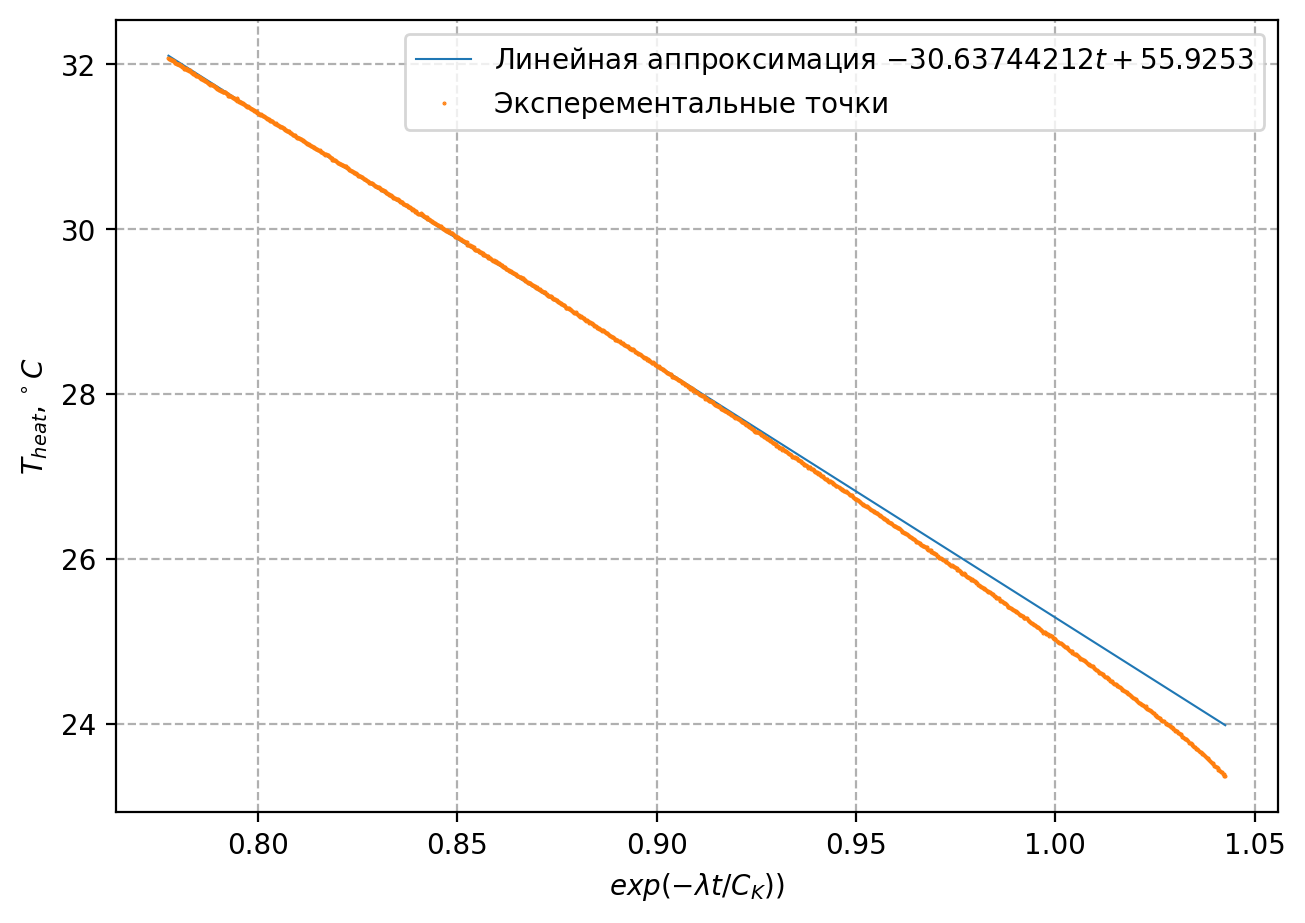

In [218]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$T_{heat}, ^\circ C$") # подписи к осям
plt.xlabel("$exp( {-\lambda t}/{C_K}))$")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.plot(int_heat_al["exp"], kha * int_heat_al["exp"] + aha,linewidth=1.5/2, label="Линейная аппроксимация $%.8f t + %.4f$" % (kha, aha)) # аппроксимация
plt.errorbar(int_heat_al["exp"], int_heat_al["Temp"],  fmt="o", label="Эксперементальные точки", ms=0.9/2)
plt.legend() # легенда

In [219]:
room_temp[room_temp.Time=="16 : 36 : 00"]

,Time,Value,Sec
108622,16 : 36 : 00,25.32613,8360.0


In [220]:
room_heat_fe=room_temp.loc[107013	:108562	].copy()
int_heat_fe=int_temp.loc[116715:118265].copy()

In [221]:
room_cool_fe=room_temp.loc[108622:].copy()
int_cool_fe=(int_temp.loc[118324:]).copy()

In [222]:
print(mnk(room_cool_fe["Sec"],room_cool_fe["Value"]))
room_cool_fe["Value"].mean()

Погрешность углового коэфицента
1.3596613159283409e-05
Погрешность свободного коэфицента
0.004731555680219036
(-0.00016863741676137367, 26.8117991202149)


25.30032801720965

In [223]:
int_cool_al

,Time,Value,Sec,Temp,ln
114869,15 : 38 : 00,18.490664,4880.0,32.063535,-2.409270e-08
114870,15 : 38 : 01,18.490179,4881.0,32.056569,-1.025654e-03
114871,15 : 38 : 02,18.490589,4882.0,32.062465,-1.574519e-04
114872,15 : 38 : 03,18.490368,4883.0,32.059283,-6.258614e-04
114873,15 : 38 : 05,18.490374,4885.0,32.059367,-6.135822e-04
...,...,...,...,...,...
116294,16 : 01 : 56,18.357904,6316.0,30.154727,-3.297430e-01
116295,16 : 01 : 57,18.357950,6317.0,30.155386,-3.296083e-01
116296,16 : 01 : 58,18.357691,6318.0,30.151656,-3.303717e-01
116297,16 : 01 : 59,18.358341,6319.0,30.161007,-3.284587e-01


In [224]:
int_cool_fe["ln"]=np.log((int_cool_fe["Temp"]-25.300)/(32.11542-25.300))

In [225]:
kcf,acf=mnk(int_cool_fe.loc[118724:]["Sec"],int_cool_fe.loc[118724:]["ln"])

Погрешность углового коэфицента
2.158121286073853e-07
Погрешность свободного коэфицента
5.005700076159091e-05


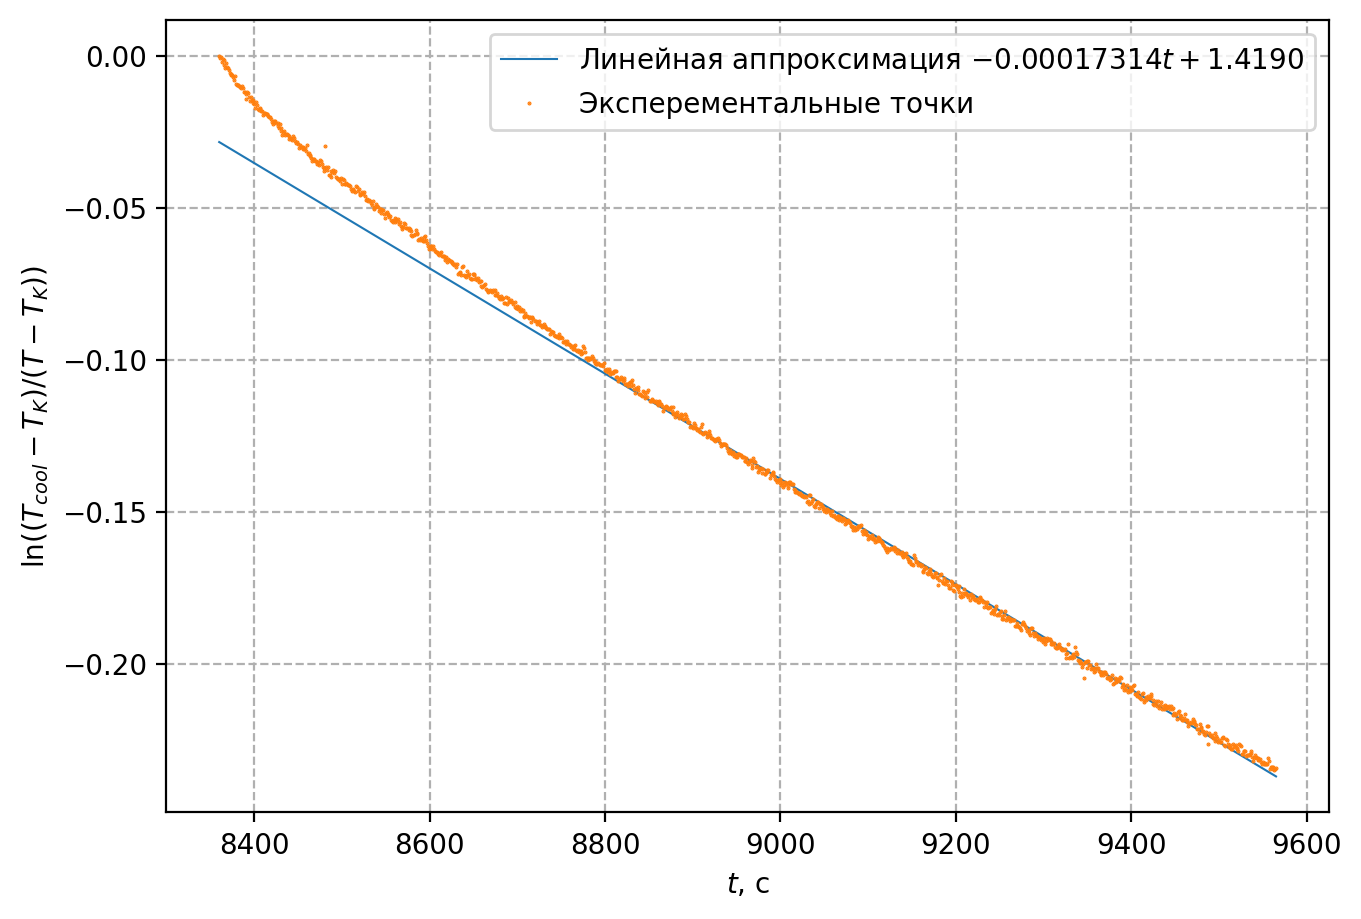

In [226]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$\ln ((T_{cool}-T_{K})/(T-T_{K}))$") # подписи к осям
plt.xlabel("$t$, с")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.plot(int_cool_fe["Sec"], kcf * int_cool_fe["Sec"] + acf,linewidth=1.5/2, label="Линейная аппроксимация $%.8f t + %.4f$" % (kcf, acf)) # аппроксимация
plt.errorbar(int_cool_fe["Sec"], int_cool_fe["ln"],  fmt="o", label="Эксперементальные точки", ms=0.9/2)
plt.legend() # легенда

In [227]:
print(mnk(room_heat_fe["Sec"],room_heat_fe["Value"]))
room_heat_fe["Value"].mean()

Погрешность углового коэфицента
1.0894263631731863e-05
Погрешность свободного коэфицента
0.0049093871210491155
(-7.938170787859617e-07, 25.29683552131869)


25.290865931871

In [228]:
int_heat_fe[25.29>int_heat_fe["Temp"]]

,Time,Value,Sec,Temp
116715,16 : 09 : 00,17.882984,6740.0,23.326332
116716,16 : 09 : 01,17.883793,6741.0,23.337960
116717,16 : 09 : 02,17.884525,6742.0,23.348490
116718,16 : 09 : 03,17.885555,6743.0,23.363300
116719,16 : 09 : 04,17.887049,6744.0,23.384773
...,...,...,...,...
116955,16 : 13 : 01,18.016916,6981.0,25.252006
116956,16 : 13 : 02,18.017529,6982.0,25.260809
116957,16 : 13 : 03,18.017874,6983.0,25.265772
116958,16 : 13 : 04,18.018530,6984.0,25.275206


In [237]:
print(mnk(int_heat_fe.loc[116955:116965].Sec,int_heat_fe.loc[116955:116965].Temp ))

Погрешность углового коэфицента
0.00022409115416016743
Погрешность свободного коэфицента
0.0007086384506420459
(0.007148927844653485, 25.282031113953625)


In [229]:
int_heat_fe["Sec"]=int_heat_fe.Sec-6985.0

In [230]:
int_heat_fe["exp"]=np.exp(kcf*int_heat_fe.Sec)
khf,ahf=mnk(int_heat_fe.loc[117115:]["exp"],int_heat_fe.loc[117115:]["Temp"])

Погрешность углового коэфицента
0.01828434906884576
Погрешность свободного коэфицента
0.0009338185087246391


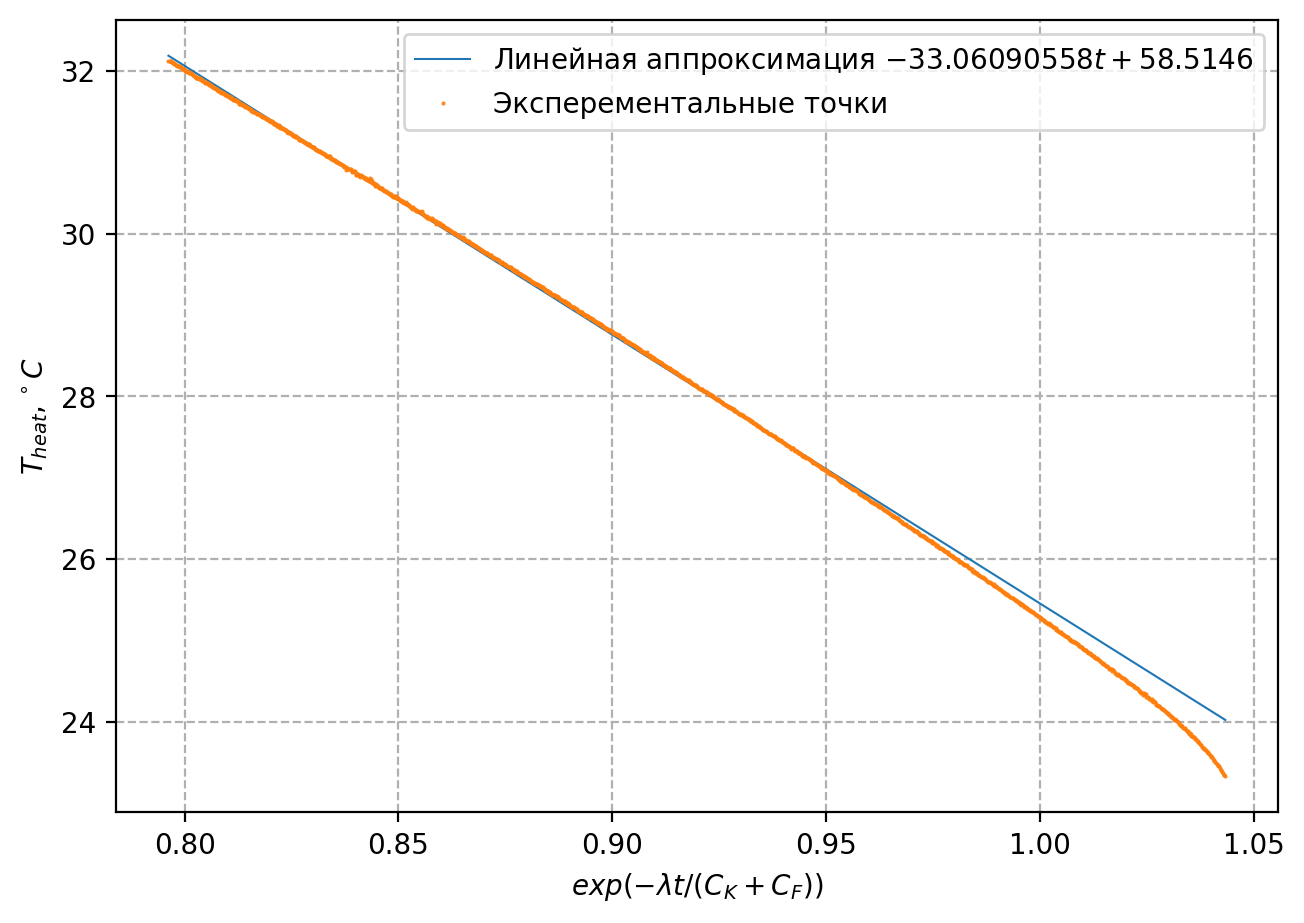

In [238]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$T_{heat}, ^\circ C$") # подписи к осям
plt.xlabel("$exp( {-\lambda t}/{(C_K+C_F}))$")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.plot(int_heat_fe["exp"], khf * int_heat_fe["exp"] + ahf,linewidth=1.5/2, label="Линейная аппроксимация $%.8f t + %.4f$" % (khf, ahf)) # аппроксимация
plt.errorbar(int_heat_fe["exp"], int_heat_fe["Temp"],  fmt="o", label="Эксперементальные точки", ms=0.9/2)
plt.legend() # легенда